In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd "/content/drive/MyDrive"

/content/drive/MyDrive


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
import numpy as np

In [30]:
model_path = ['colab/model/dog_unet_model_10.h5',
              'colab/model/dog_unet_model_11.h5',
              'colab/model/dog_unet_model_12.h5'
              ]

unet_models = [load_model(path)for path in model_path]

In [31]:
img_path = 'colab/data/test/dog/A1/IMG_D_A1_000001.jpg'
img = load_img(img_path, target_size=(256, 256))
img_array = img_to_array(img)
img_array = img_array / 255.0
img_batch = np.expand_dims(img_array, axis=0)

In [51]:
masks = [model.predict(img_batch)[0].squeeze() for model in unet_models]
masks = np.array(masks)

threshold = 2 / len(unet_models)
consensus_mask = np.where(np.sum(masks > 0.5, axis=0) >= threshold, 1, 0)

overlay = img_array.copy()
overlay[..., 0] = np.clip(overlay[..., 0] + consensus_mask * 0.5, 0, 1)

1/1 [==============================] - 1s 517ms/step


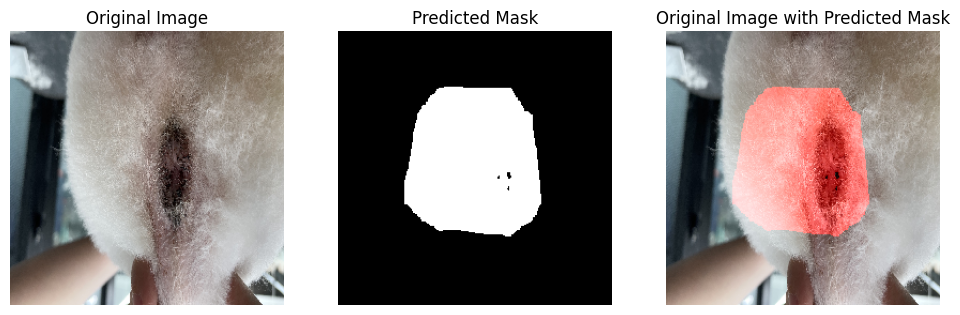

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(consensus_mask, cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.title('Original Image with Predicted Mask')
plt.axis('off')

plt.show()

